In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import graphviz

## 1. Read the data set from the zip file and partition it into training and testing data. You should have approximately 75% training data and 25% testing data.

The dataset can be divided into training and testing data by `train_test_split()`, and the sizes are determined according to the task's requirement.

In [2]:
X = pd.read_csv("data/data_X.csv")
y = pd.read_csv("data/data_y.csv")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
(X_train.shape[0] / X.shape[0], X_test.shape[0] / X.shape[0])

(0.75, 0.25)

In [5]:
(y_train.shape[0] / y.shape[0], y_test.shape[0] / y.shape[0])

(0.75, 0.25)

## 2. Train a tree classifier to predict the labels from the data set. Use only the training data you created above. How many leaves are there? What is the depth of the tree? Show the nodes of the resulting tree.

Decision tree model are aimed at finding criteria to cut feature space into smaller rectangles, thus reach the goal of classification. The criteria can be derived from several ways, and Gini impunity is one of those measures. Gini impunity measures the possibility that an element in a set is mislabeled, and hence the criterion is decided by the point that achieves least Gini impunity. 

`DecisionTreeClassifier` can be used to obtain decision tree models, and the results are shown below. 

In [39]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

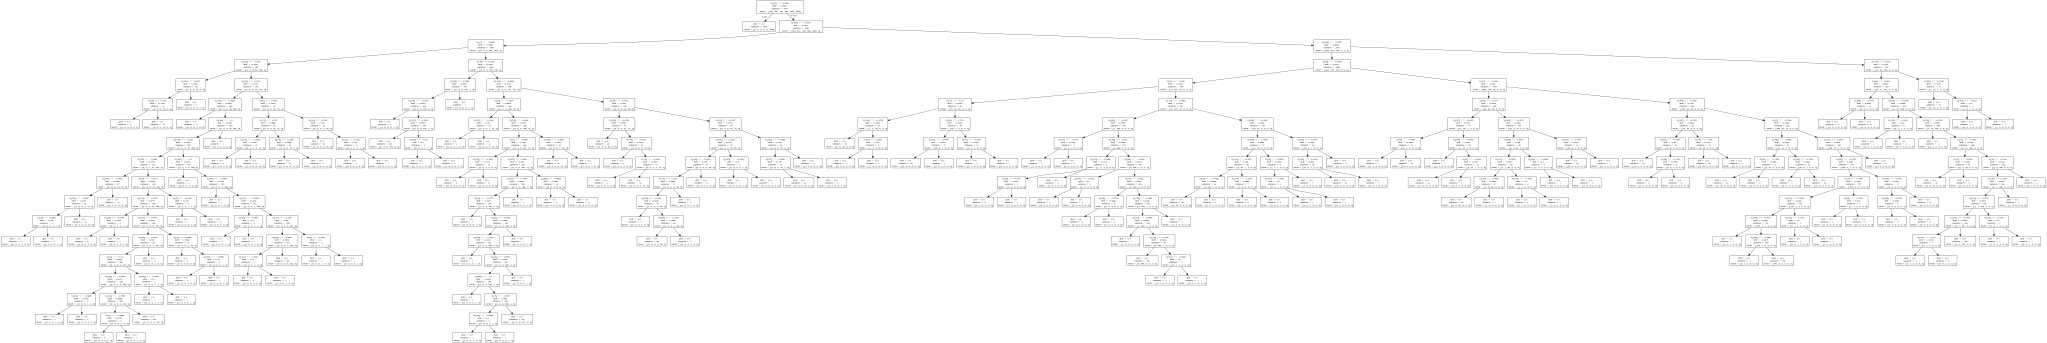

In [40]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

## 3. Examine the result by reporting the missclassification rate on both the testing and training data set. Would you say this classifier produces a good result? Why? Why not?

The confusion matrix below reveals that training samples are all correctly labeled, an outcome due to the trained model is a full-grown tree, namely the tree is not pruned. A full-grown tree determines the criterion for all features using the training data, thus it can attain perfect accurary when predicting training set.

In fact, however, a fully grown tree comes with high variance, given that the effect of an incorrect label will propagate from root to leaves. Therefore the model can be highly sensitive to slight change of the input data, a phenomenon also known as overfitting. The instability can be seen from the confusion matrix with predictions of the test dataset. Each label's missclassification rate except the last one lies between 5% and 10% instead of 0%.

In [72]:
y_train_pred = clf.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[ 923,    0,    0,    0,    0,    0],
       [   0,  817,    0,    0,    0,    0],
       [   0,    0,  730,    0,    0,    0],
       [   0,    0,    0,  958,    0,    0],
       [   0,    0,    0,    0, 1022,    0],
       [   0,    0,    0,    0,    0, 1064]])

In [73]:
cm = confusion_matrix(y_train, y_train_pred)
1 - np.diag(cm) / np.sum(cm, axis = 1)

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [74]:
y_test_pred = clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[285,  11,   7,   0,   0,   0],
       [ 15, 233,   8,   0,   0,   0],
       [ 13,  14, 229,   0,   0,   0],
       [  0,   0,   0, 300,  28,   0],
       [  1,   0,   0,  26, 325,   0],
       [  0,   0,   0,   0,   0, 343]])

In [75]:
cm = confusion_matrix(y_test, y_test_pred)
mis_rates_clf = np.diag(cm) / np.sum(cm, axis = 0)
1 - mis_rates_clf

array([ 0.09235669,  0.09689922,  0.06147541,  0.0797546 ,  0.07932011,  0.        ])

## 4. Train a classifier to predict the labels from the data set using the following approaches:

1. a bagging approach,
2. a boosting approach,
3. a random forest approach

To reduce the high variance in decision tree models could have, a widely used approach is to train several pruned trees and then aggregate the results of the small trees. Bagging (Bootstrap Aggregating) is basically developed on this notion: the model randomly samples a number of subsets, then constructs decision tree for each subset, and finally predicts based on which label appears the most times in those decision trees.

Bagging can be carried out by `BaggingClassifier`. The results show that though there exists little increase in misclassification rates with training dataset, the misclassification rates with test dataset improve by 1% to 7%.

### 4.1 Bagging 

In [55]:
bc = BaggingClassifier(random_state=42)
bc.fit(X_train, y_train.values.ravel())

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
         verbose=0, warm_start=False)

In [56]:
y_train_pred = bc.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[ 923,    0,    0,    0,    0,    0],
       [   1,  814,    2,    0,    0,    0],
       [   0,    1,  729,    0,    0,    0],
       [   0,    0,    0,  957,    1,    0],
       [   0,    0,    0,    5, 1017,    0],
       [   0,    0,    0,    0,    0, 1064]])

In [57]:
cm_train = confusion_matrix(y_train, y_train_pred)
mis_rates_bc_train = np.diag(cm_train) / np.sum(cm_train, axis = 0)
1 - mis_rates_bc_train

array([ 0.00108225,  0.00122699,  0.00273598,  0.00519751,  0.00098232,  0.        ])

In [58]:
y_test_pred = bc.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[299,   4,   0,   0,   0,   0],
       [  2, 250,   4,   0,   0,   0],
       [  5,   8, 243,   0,   0,   0],
       [  0,   0,   0, 312,  16,   0],
       [  0,   0,   0,  22, 330,   0],
       [  0,   0,   0,   0,   0, 343]])

In [59]:
cm = confusion_matrix(y_test, y_test_pred)
mis_rates_bc_test = np.diag(cm) / np.sum(cm, axis = 0)
1 - mis_rates_bc_test

array([ 0.02287582,  0.04580153,  0.01619433,  0.06586826,  0.04624277,  0.        ])

### 4.2 Boosting (Gradient Boosting)

The fundamental idea of boosting is to train trees iteratively: a new tree is built on the information of previous trees. The information can be attained by a loss function, which measures the difference of true values and predicted values. To minimize the loss function, gradient descent is a common approach in pratice. And gradient boosting combines the concepts of boosting and gradient descent to achieve better performance.

The following results show that the gradient boosting (by `GradientBoostingClassifier`) works successfully both on the training and test dataset. 

In [76]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)

In [77]:
y_train_pred = gbc.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[ 923,    0,    0,    0,    0,    0],
       [   0,  817,    0,    0,    0,    0],
       [   0,    0,  730,    0,    0,    0],
       [   0,    0,    0,  958,    0,    0],
       [   0,    0,    0,    0, 1022,    0],
       [   0,    0,    0,    0,    0, 1064]])

In [80]:
cm_train = confusion_matrix(y_train, y_train_pred)
mis_rates_gbc_train = np.diag(cm_train) / np.sum(cm_train, axis = 0)
1 - mis_rates_gbc_train

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [81]:
y_test_pred = gbc.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[302,   1,   0,   0,   0,   0],
       [  0, 256,   0,   0,   0,   0],
       [  0,   1, 255,   0,   0,   0],
       [  0,   0,   0, 315,  13,   0],
       [  0,   0,   0,   8, 344,   0],
       [  0,   0,   0,   0,   0, 343]])

In [82]:
cm_test = confusion_matrix(y_test, y_test_pred)
mis_rates_gbc_test = np.diag(cm_test) / np.sum(cm_test, axis = 0)
1 - mis_rates_gbc_test

array([ 0.        ,  0.00775194,  0.        ,  0.0247678 ,  0.03641457,  0.        ])

### 4.3 Random Forest

Random forest can be seen as augmented model of Bagging. The main difference is that this model choose not only subsamples, but also subsets of the features for training trees.

After applying random forest (by `RandomForestClassifier`) we can that the missclassification rates with test dataset decrease compared to that of the single decision tree in task 3.

In [67]:
rrc = RandomForestClassifier(random_state=42)
rrc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [68]:
y_train_pred = rrc.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[ 923,    0,    0,    0,    0,    0],
       [   0,  817,    0,    0,    0,    0],
       [   1,    0,  729,    0,    0,    0],
       [   0,    0,    0,  958,    0,    0],
       [   0,    0,    0,    2, 1020,    0],
       [   0,    0,    0,    0,    0, 1064]])

In [69]:
cm_train = confusion_matrix(y_train, y_train_pred)
mis_rates_rrc_train = np.diag(cm_train) / np.sum(cm_train, axis = 0)
1 - mis_rates_rrc_train

array([ 0.00108225,  0.        ,  0.        ,  0.00208333,  0.        ,  0.        ])

In [70]:
y_test_pred = rrc.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[300,   2,   1,   0,   0,   0],
       [  5, 249,   2,   0,   0,   0],
       [  5,   9, 242,   0,   0,   0],
       [  0,   0,   0, 314,  14,   0],
       [  0,   0,   0,  23, 329,   0],
       [  0,   0,   0,   0,   0, 343]])

In [71]:
cm = confusion_matrix(y_test, y_test_pred)
mis_rates_rrc_test = np.diag(cm) / np.sum(cm, axis = 0)
1 - mis_rates_rrc_test

array([ 0.03225806,  0.04230769,  0.0122449 ,  0.06824926,  0.04081633,  0.        ])

## 5. Examine the result by reporting the misclassification rates of all approaches on both the testing and training data set. Compare the results using the Gini index. Which approach would you recommend and why?

The misclassification rates have already all listed in task 4, and the Gini index for each approach is computed below. For this dataset, gradient boosting is recommeded given that this approach obtained the least gini impunity in both training and test datasets (0 and 0.067). 

### 5.1 Training

In [27]:
bc_gini_train = sum(mis_rates_bc_train * (1 - mis_rates_bc_train))
bc_gini_train

0.011186905161037845

In [28]:
gbc_gini_train = sum(mis_rates_gbc_train * (1 - mis_rates_gbc_train))
gbc_gini_train

0.0

In [29]:
rrc_gini_train = sum(mis_rates_rrc_train * (1 - mis_rates_rrc_train))
rrc_gini_train

0.0031600728704016434

### 5.2 Testing

In [30]:
bc_gini_test = sum(mis_rates_bc_test * (1 - mis_rates_bc_test))
bc_gini_test

0.18762235216061415

In [31]:
gbc_gini_test = sum(mis_rates_gbc_test * (1 - mis_rates_gbc_test))
gbc_gini_test

0.066934748512719522

In [32]:
rrc_gini_test = sum(mis_rates_rrc_test * (1 - mis_rates_rrc_test))
rrc_gini_test

0.18657184464221849

## References
1. http://ieeexplore.ieee.org/document/709601/ (rrf)
2. https://statweb.stanford.edu/~jhf/ftp/trebst.pdf (gradient)